# 1. Introdução

--- EXPLIQUE ---

# 2. Dependências

-- EXPLIQUE --

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time

# 3. Funções Auxiliares

-- Explique --

In [6]:
def show_image(img, title="Imagem"):
    if isinstance(img, np.ndarray):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

def draw_fps(img, text):

  fps_text = f"FPS: {text:.2f}"
  cv2.putText(img, fps_text, (10, 30),
              fontFace=cv2.FONT_HERSHEY_SIMPLEX,
              fontScale=1.0,
              color=(0, 0, 0),
              thickness=2,
              lineType=cv2.LINE_AA)

def detect_faces(image):

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

  return faces


def draw_rectangle(img, face):
  x, y, w, h = face
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

def dist_to_center(face):
  global cx_img

  x, _, w, _ = face
  cx = x + w / 2

  return (cx - cx_img)**2

def area(face):
  return face[2] * face[3]

def crop_face(image, face):
  x, y, w, h = face
  return image[y:y+h, x:x+w]


# 4. Dados

In [7]:
# Verifica se já foram baixadas as imagens do drive, baixando-as e descompactando se necessário
! [ ! -d "/content/lena.png" ] && gdown -O /content/lena.png "16HLcddcqiAv92JsuJ0dbg9NKSz4D2dvj"
! [ ! -d "/content/pessoas.jpg" ] && gdown -O /content/pessoas.jpg "19Q9M_vCwIxyUK4C45F2ZjRZcKUoBUugq"

'[' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'[' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


Código abaixo foi adicionado para funcionamento correto das demais etapas uma vez que foi executado no Windows e não Bash do Google Colab 

In [8]:
# instala
!python -m pip install -q gdown
# baixa se não existir (CMD usa IF NOT EXIST)
!if not exist "lena.png" gdown --id 16HLcddcqiAv92JsuJ0dbg9NKSz4D2dvj -O "lena.png"
!if not exist "pessoas.jpg" gdown --id 19Q9M_vCwIxyUK4C45F2ZjRZcKUoBUugq -O "pessoas.jpg"


# 5. Implementações

-- EXPLIQUE --

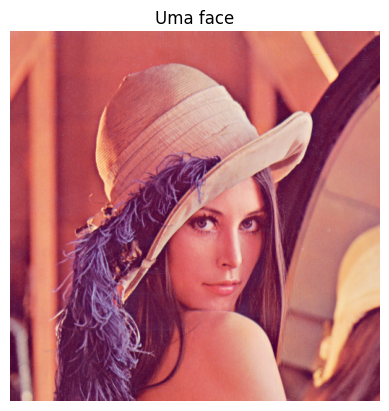

In [9]:
image1 = cv2.imread("lena.png")
show_image(image1, "Uma face")

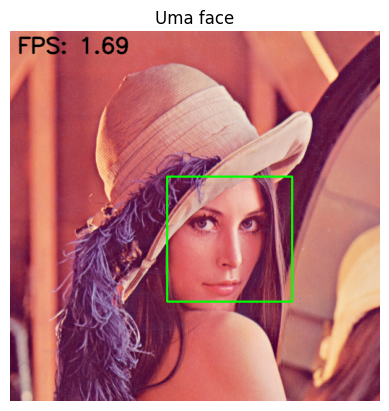

In [10]:
start = time.time()
faces = detect_faces(image1)
fps = 1.0 / (time.time() - start)

image_haar = image1.copy()
for (x, y, w, h) in faces:
    draw_rectangle(image_haar, (x, y, w, h))

draw_fps(image_haar, fps)
show_image(image_haar, "Uma face")

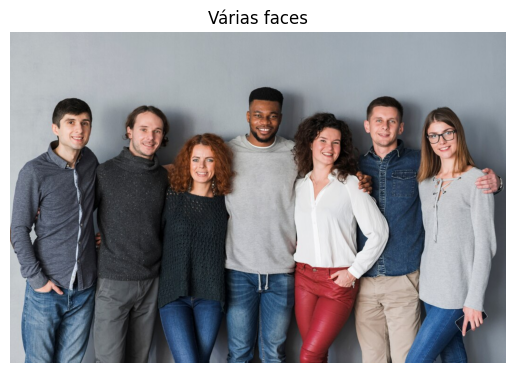

In [11]:
imageN = cv2.imread("pessoas.jpg")
show_image(imageN, "Várias faces")

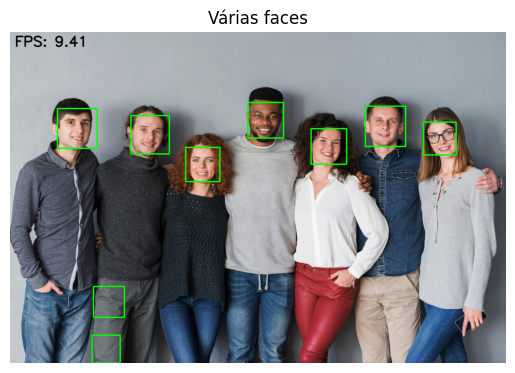

In [12]:
start = time.time()
faces = detect_faces(imageN)
fps = 1.0 / (time.time() - start)

image_haar = imageN.copy()

for (x, y, w, h) in faces:
    draw_rectangle(image_haar, (x, y, w, h))

draw_fps(image_haar, fps)
show_image(image_haar, "Várias faces")

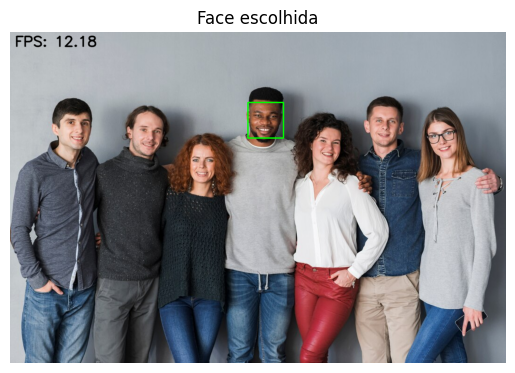

In [13]:
gray = cv2.cvtColor(imageN, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

start = time.time()

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=20)

_, w_img = gray.shape[:2]
cx_img = w_img / 2

center_face = sorted(faces, key=dist_to_center)[0]

fps = 1.0 / (time.time() - start)

image_haar = imageN.copy()
x, y, w, h = center_face

cv2.rectangle(image_haar, (x, y), (x + w, y + h), (0, 255, 0), 2)
draw_fps(image_haar, fps)

show_image(image_haar, "Face escolhida")

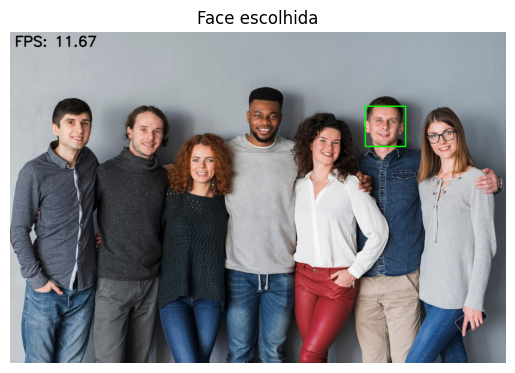

In [14]:
gray = cv2.cvtColor(imageN, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

start = time.time()

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=20)

largest_face = sorted(faces, key=area, reverse=True)[0]

fps = 1.0 / (time.time() - start)

image_haar = imageN.copy()
x, y, w, h = largest_face

cv2.rectangle(image_haar, (x, y), (x + w, y + h), (0, 255, 0), 2)
draw_fps(image_haar, fps)

show_image(image_haar, "Face escolhida")

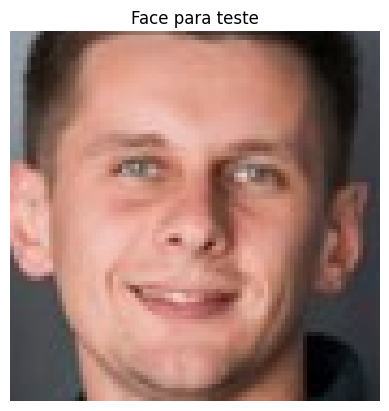

In [15]:
input_image = crop_face(imageN, largest_face)

show_image(input_image, "Face para teste")